In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [1]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

In [ ]:
file_name = "/content/skin-disease-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# List the contents of the /content directory
!ls /content


media  sample_data  skin-disease-datasaet  skin-disease-dataset.zip


In [ ]:
# Load training and testing data
train_images, train_labels = load_data('/content/skin-disease-datasaet/train_set')
test_images, test_labels = load_data('/content/skin-disease-datasaet/test_set')


  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
def load_data(data_dir):
    images = []
    labels = []
    class_dirs = os.listdir(data_dir)
    for class_dir in class_dirs:
        class_label = class_dir.split('_')[-1]
        class_path = os.path.join(data_dir, class_dir)
        for image_path in tqdm(glob.glob(os.path.join(class_path, '*.jpg'))):
            try:
                img = preprocess_image(image_path)
                images.append(img)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(images), labels

# Load training and testing data
train_images, train_labels = load_data('/content/skin-disease-datasaet/train_set')
test_images, test_labels = load_data('/content/skin-disease-datasaet/test_set')


  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


Train images shape: (819, 224, 224, 3)
Test images shape: (212, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


Train images shape: (819, 224, 224, 3)
Test images shape: (212, 224, 224, 3)


In [ ]:
def load_data(data_dir):
    images = []
    labels = []
    class_dirs = os.listdir(data_dir)
    for class_dir in class_dirs:
        class_label = class_dir.split('_')[-1]
        class_path = os.path.join(data_dir, class_dir)
        for image_path in tqdm(glob.glob(os.path.join(class_path, '*.jpg'))):
            try:
                img = preprocess_image(image_path)
                images.append(img)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(images), labels

# Load training and testing data
train_images, train_labels = load_data('/content/skin-disease-datasaet/train_set')
test_images, test_labels = load_data('/content/skin-disease-datasaet/test_set')

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Train images shape: (819, 224, 224, 3)
Test images shape: (212, 224, 224, 3)


In [ ]:
from keras.layers import Input

# Redefine the model with an explicitly defined input shape
input_shape = (100, 100, 3)  # Assuming images are resized to (100, 100)
model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Resize images to (100, 100)
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Update preprocess_image function
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Resize images to (100, 100)
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img

# Load and prepare the data
train_images, train_labels = load_data('/content/skin-disease-datasaet/train_set')
test_images, test_labels = load_data('/content/skin-disease-datasaet/test_set')

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Define and compile the model
input_shape = (100, 100, 3)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)
print(f'Test Accuracy: {test_accuracy}')

# Optionally, make predictions
predictions = model.predict(test_images)


  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/10
26/26 [==============================] - 14s 508ms/step - loss: -5916.9321 - accuracy: 0.0891 - val_loss: -33677.0039 - val_accuracy: 0.0755
Epoch 2/10
26/26 [==============================] - 12s 472ms/step - loss: -243972.8281 - accuracy: 0.0879 - val_loss: -745995.1875 - val_accuracy: 0.0755
Epoch 3/10
26/26 [==============================] - 12s 480ms/step - loss: -2355016.7500 - accuracy: 0.0879 - val_loss: -5427859.5000 - val_accuracy: 0.0755
Epoch 4/10
26/26 [==============================] - 13s 487ms/step - loss: -12174073.0000 - accuracy: 0.0879 - val_loss: -22766078.0000 - val_accuracy: 0.0755
Epoch 5/10
26/26 [==============================] - 12s 480ms/step - loss: -41667636.0000 - accuracy: 0.0879 - val_loss: -68837712.0000 - val_accuracy: 0.0755
Epoch 6/10
26/26 [==============================] - 14s 527ms/step - loss: -112132096.0000 - accuracy: 0.0879 - val_loss: -167358096.0000 - val_accuracy: 0.0755
Epoch 7/10
26/26 [==============================] - 13s 4

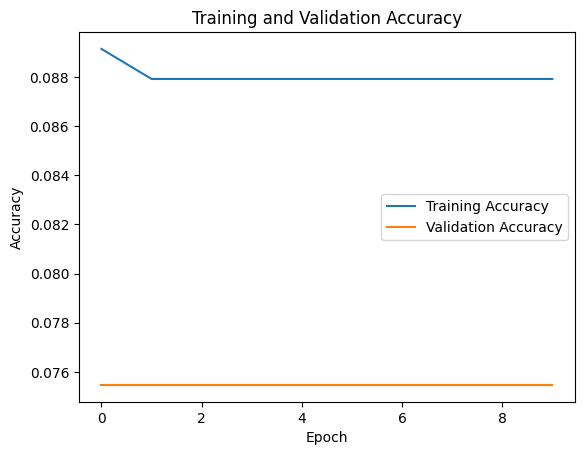

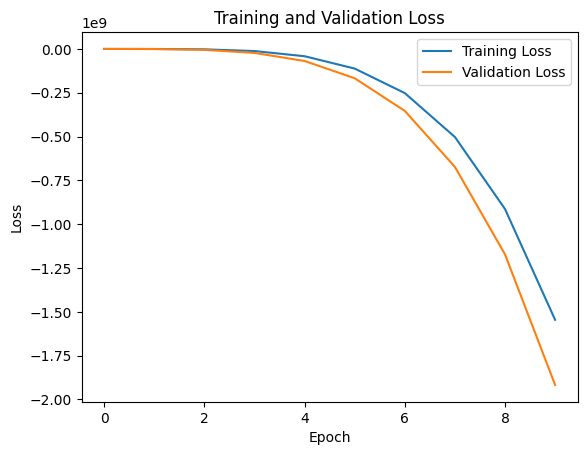

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('skin_disease_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
import numpy as np

# Load and preprocess the image
image_path = '/content/skin-disease-datasaet/test_set/FU-athlete-foot/FU-athlete-foot (1).jpeg'
img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))  # Resize to match the input shape expected by the model
img = img / 255.0  # Normalize pixel values to range [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions
prediction = model.predict(img)

# Decode the prediction (assuming binary classification)
class_label = 'Normal' if prediction < 0.5 else 'Disease'
confidence = prediction if class_label == 'Disease' else 1 - prediction
confidence = confidence[0][0]

print(f'Predicted class: {class_label}')
print(f'Confidence: {confidence}')


1/1 [==============================] - 0s 26ms/step
Predicted class: Disease
Confidence: 1.0


In [ ]:
# Define class labels
class_labels = ['BA-cellulitis', 'FU-nail-fungus', 'FU-athlete-foot']

# Make predictions
predictions = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted disease
predicted_disease = class_labels[predicted_class_index]

# Print predicted disease
print(f'Predicted disease: {predicted_disease}')


1/1 [==============================] - 0s 26ms/step
Predicted disease: BA-cellulitis


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

# Encode string labels to numeric labels
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)

# Ensure y_pred_classes is also numeric labels (if not, convert them accordingly)

# Calculate precision, recall, and F1-score
precision = precision_score(test_labels_encoded, y_pred_classes, average='weighted')
recall = recall_score(test_labels_encoded, y_pred_classes, average='weighted')
f1 = f1_score(test_labels_encoded, y_pred_classes, average='weighted')

print(f'Precision: {precision}, Recall: {recall}, F1-score: {f1}')


Precision: 0.021382164471342113, Recall: 0.14622641509433962, F1-score: 0.037308797266868546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(test_labels_encoded, y_pred_classes, target_names=label_encoder.classes_))


                            precision    recall  f1-score   support

            BA- cellulitis       0.15      1.00      0.26        31
               BA-impetigo       0.00      0.00      0.00        16
           FU-athlete-foot       0.00      0.00      0.00        30
            FU-nail-fungus       0.00      0.00      0.00        33
               FU-ringworm       0.00      0.00      0.00        20
PA-cutaneous-larva-migrans       0.00      0.00      0.00        24
             VI-chickenpox       0.00      0.00      0.00        27
               VI-shingles       0.00      0.00      0.00        31

                  accuracy                           0.15       212
                 macro avg       0.02      0.12      0.03       212
              weighted avg       0.02      0.15      0.04       212



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
import os
print(os.path.exists('/content/train_set'))


False


In [ ]:
from google.colab import files

# Upload the training data
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# 1. Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 2. Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/skin-disease-datasaet/train_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/skin-disease-datasaet/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# 3. Define model architecture (VGG16 with custom classification head)
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


FileNotFoundError: [Errno 2] No such file or directory: '/content/skin-disease-datasaet/train_set'

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


NameError: name 'history' is not defined